In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


#Question 1 
Gradient Boosting Classifier from Scratch




In [4]:
#Loading the data
from mlxtend.data import loadlocal_mnist
x_train, train_labels = loadlocal_mnist(images_path='/content/drive/MyDrive/datadmg/mnist/train-images-idx3-ubyte', labels_path='/content/drive/MyDrive/datadmg/mnist/train-labels-idx1-ubyte')
x_test, test_labels = loadlocal_mnist(images_path='/content/drive/MyDrive/datadmg/mnist/t10k-images-idx3-ubyte', labels_path='/content/drive/MyDrive/datadmg/mnist/t10k-labels-idx1-ubyte')
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
def logistic(x):
  return np.exp(x)/(1+np.exp(x))

labels = np.arange(10)
encoding = {}
trees = {}
step_prob = {}
init_val = {}
scores = {}
for i in labels:
  encoding[i] = []
  trees[i] = []
  step_prob[i] = []
  init_val[i] = []
  scores[i] = []

cn = np.zeros(10)
for train_labels in train_labels:
  cn[train_labels]+=1
  for i in labels:
    if i == train_labels:
      encoding[i].append(1)
    else:
      encoding[i].append(0)


log_odds = {}
priors = {}
residuals = {}
tot = len(train_labels)

for i in labels:
  log_odds[i] = np.log(cn[i]/(tot-cn[i]))
  log_odds[i] = np.full(tot,log_odds[i])
  priors[i] = logistic(log_odds[i])
  init_val[i] = priors[i][0]

lr = 0.1
for i in range(5):
  for l in labels:
    err = encoding[l] - priors[l]
    residuals[l] = err
    dT = DecisionTreeRegressor(max_depth=1)
    dT.fit(x_train,residuals[l])
    trees[l].append(dT)
    pred = trees[l][i].predict(x_test)

    probs = np.unique(pred)
    step_prob[l].append(probs)

    score = [0,0]
    denom= [0,0]
    arr0 = []
    arr1 = []

    for k in range(pred.shape[0]):
      if pred[k] == probs[0]:
        score[0] += residuals[l][k]
        arr0.append(priors[l][k])
      else:
        score[1] += residuals[l][k]
        arr1.append(priors[l][k])
    arr0 = np.array(arr0)
    arr1 = np.array(arr1)
    denom[0] = np.sum(np.multiply(arr0,1-arr0))
    denom[1] = np.sum(np.multiply(arr1,1-arr1))
    scores[l].append([score[0]/denom[0],score[1]/denom[1]])

    for k in range(pred.shape[0]):
      if(pred[k] == probs[0]):
        log_odds[l][k] += lr*score[0]
      else:
        log_odds[l][k] += lr*score[1]
    priors[l] = logistic(log_odds[l])

In [ ]:
predict = []
for i in range(x_test.shape[0]):
  ans = init_val.copy()
  for l in labels:
    for j in range(len(trees[l])):
      val = trees[l][j].predict([x_test[i]])[0]
      pred = step_prob[l][j][0]
      if(val==pred):
        ans[l] += lr*scores[l][j][0]
      else:
        ans[l] += lr*scores[l][j][1]
    
  cls = np.argmax(list(ans.values()))
  predict.append(cls)

In [ ]:
print("Total Accuracy: ",accuracy_score(predict,test_labels))

Total Accuracy:  0.5938


#Question 2

Feed forward Neural Network


In [9]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/datadmg/fashion-mnist_train.csv')
train_label = train['label']
train = train.drop(['label'],axis=1)
train = train.to_numpy()
train_label = train_label.to_numpy()
print(train.shape)
print(train_label.shape)
test = pd.read_csv('/content/drive/MyDrive/datadmg/fashion-mnist_test.csv')
test_label = test['label']
test = test.drop(['label'],axis=1)
test = test.to_numpy()
test_label = test_label.to_numpy()


(60000, 784)
(60000,)


In [ ]:
model = Sequential()
#Input Layer
model.add(Dense(256, input_dim = 784, trainable=True,activation='relu',kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.5,seed = None)))

#Hidden layers
model.add(Dense(128, trainable=True,activation='relu',kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.5,seed = None)))
model.add(Dense(64, trainable=True,activation='relu',kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.5,seed = None)))

#Add bacth Normalization
model.add(BatchNormalization())

#Output layer
model.add(Dense(10, trainable=True,activation='softmax'))

#Optimizer
sgd = optimizers.SGD(learning_rate = 0.015, momentum = 0.9)

model.compile(optimizer = sgd, loss = 'categorical_crossentropy',metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 243,018
Trainable params: 242,890
Non-trainable params: 128
______________________________________________

In [ ]:
history = model.fit(train,to_categorical(train_label),epochs=100,batch_size = 256,shuffle=True)

Epoch 1/100
235/235 [==============================] - 6s 18ms/step - loss: 0.8395 - accuracy: 0.7078
Epoch 2/100
235/235 [==============================] - 4s 18ms/step - loss: 0.5643 - accuracy: 0.7983
Epoch 3/100
235/235 [==============================] - 4s 18ms/step - loss: 0.5137 - accuracy: 0.8168
Epoch 4/100
235/235 [==============================] - 4s 18ms/step - loss: 0.4851 - accuracy: 0.8274
Epoch 5/100
235/235 [==============================] - 4s 18ms/step - loss: 0.4647 - accuracy: 0.8346
Epoch 6/100
235/235 [==============================] - 4s 19ms/step - loss: 0.4561 - accuracy: 0.8377
Epoch 7/100
235/235 [==============================] - 4s 19ms/step - loss: 0.4391 - accuracy: 0.8426
Epoch 8/100
235/235 [==============================] - 4s 18ms/step - loss: 0.4280 - accuracy: 0.8473
Epoch 9/100
235/235 [==============================] - 4s 18ms/step - loss: 0.4176 - accuracy: 0.8509
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.410

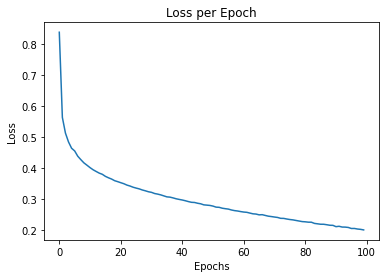

In [ ]:
loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred,axis = 1)

accuracy = np.zeros(10)
cn = np.zeros(10)

for i,j in zip(pred,test_label):
  if i == j:
    accuracy[j]+=1
  cn[j]+=1

print("Class wise accuracy scores: ",accuracy/cn)

Class wise accuracy scores:  [0.814 0.983 0.837 0.903 0.831 0.916 0.617 0.931 0.957 0.952]


In [ ]:
print("Total Accuracy: ",np.sum(accuracy)/np.sum(cn))

Total Accuracy:  0.8741


#Question 3


In [5]:
from keras import Input,Model

In [6]:
#Loading the data
from mlxtend.data import loadlocal_mnist
x_train, train_labels = loadlocal_mnist(images_path='/content/drive/MyDrive/datadmg/mnist/train-images-idx3-ubyte', labels_path='/content/drive/MyDrive/datadmg/mnist/train-labels-idx1-ubyte')
x_test, test_labels = loadlocal_mnist(images_path='/content/drive/MyDrive/datadmg/mnist/t10k-images-idx3-ubyte', labels_path='/content/drive/MyDrive/datadmg/mnist/t10k-labels-idx1-ubyte')
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
def autoencoders(x_train):
  input_layer = Input(shape = (784,))
  il1 = Dense(512,activation='relu')(input_layer)
  il2 = Dense(128,activation='relu')(il1)
  il3 = Dense(64,activation='relu')(il2)
  ol2 = Dense(128,activation='relu')(il3)
  ol1 = Dense(512,activation='relu')(ol2)
  output_layer = Dense(784,activation='relu')(ol1)

  autoencoder = Model(input_layer,output_layer)
  autoencoder.compile(optimizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-8),loss = 'mean_squared_error')
  history = autoencoder.fit(x_train,x_train,batch_size=256,epochs=15)

  return history.history, autoencoder

Epoch 1/15
235/235 [==============================] - 8s 33ms/step - loss: 2076.3442
Epoch 2/15
235/235 [==============================] - 8s 32ms/step - loss: 1203.5323
Epoch 3/15
235/235 [==============================] - 8s 35ms/step - loss: 1080.0507
Epoch 4/15
235/235 [==============================] - 13s 56ms/step - loss: 1016.4763
Epoch 5/15
235/235 [==============================] - 8s 33ms/step - loss: 976.0572
Epoch 6/15
235/235 [==============================] - 8s 32ms/step - loss: 945.9897
Epoch 7/15
235/235 [==============================] - 10s 43ms/step - loss: 924.0935
Epoch 8/15
235/235 [==============================] - 8s 34ms/step - loss: 906.9499
Epoch 9/15
235/235 [==============================] - 12s 53ms/step - loss: 890.5242
Epoch 10/15
235/235 [==============================] - 8s 36ms/step - loss: 878.4138
Epoch 11/15
235/235 [==============================] - 8s 33ms/step - loss: 867.5396
Epoch 12/15
235/235 [==============================] - 8s 32ms/step

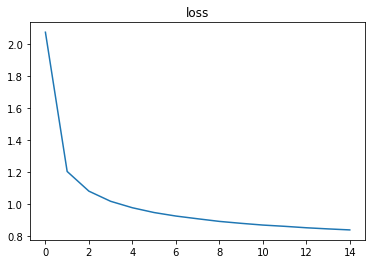

In [12]:
AEhistory, AEmodel = autoencoders(x_train)

plt.plot(np.array(AEhistory["loss"])/1000)
plt.title('loss')
plt.show()

In [13]:
def NeuralNetwork(x_train, y_train):
    input_layer = Input(shape=(784,))
    ilayer1 = Dense(512, activation="relu")(input_layer)
    ilayer2 = Dense(128, activation="relu")(ilayer1)
    ilayer3 = Dense(64, activation="relu")(ilayer2)
    ilayer4 = Dense(32, activation="relu")(ilayer3)
    output_layer = Dense(10, activation="softmax")(ilayer4)
    
    model = Model(input_layer, output_layer)
    label = np.unique(y_train)
    y_train = to_categorical(y_train, len(label))
    
    model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
    history = model.fit(x_train, y_train, batch_size = 256, epochs = 20)
    
    return history.history, model

Epoch 1/20
235/235 [==============================] - 4s 16ms/step - loss: 2.0064 - accuracy: 0.8265
Epoch 2/20
235/235 [==============================] - 3s 15ms/step - loss: 0.2525 - accuracy: 0.9311
Epoch 3/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1571 - accuracy: 0.9554
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 0.1108 - accuracy: 0.9676
Epoch 5/20
235/235 [==============================] - 4s 19ms/step - loss: 0.0799 - accuracy: 0.9755
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0712 - accuracy: 0.9788
Epoch 7/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0550 - accuracy: 0.9828
Epoch 8/20
235/235 [==============================] - 7s 32ms/step - loss: 0.0549 - accuracy: 0.9836
Epoch 9/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 10/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0500 - accura

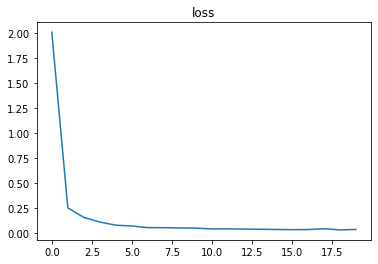

In [14]:
NNhistory, NNmodel = NeuralNetwork(x_train, train_labels)

plt.plot(NNhistory["loss"])
plt.title('loss')
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(NNmodel.predict(x_test), axis=1)
print(accuracy_score(y_pred, test_labels) * 100)

cm = confusion_matrix(test_labels, y_pred)
class_wise_accuracy = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]).diagonal()
print(class_wise_accuracy)

97.06
[0.9877551  0.9938326  0.97383721 0.96534653 0.96537678 0.97982063
 0.97703549 0.95914397 0.93326489 0.96828543]


#Question 4



In [ ]:
from sklearn.tree import DecisionTreeClassifier
import random

In [ ]:
#Loading the data
from mlxtend.data import loadlocal_mnist
x_train, train_labels = loadlocal_mnist(images_path='/content/drive/MyDrive/datadmg/mnist/train-images-idx3-ubyte', labels_path='/content/drive/MyDrive/datadmg/mnist/train-labels-idx1-ubyte')
x_test, test_labels = loadlocal_mnist(images_path='/content/drive/MyDrive/datadmg/mnist/t10k-images-idx3-ubyte', labels_path='/content/drive/MyDrive/datadmg/mnist/t10k-labels-idx1-ubyte')
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
trees = []
for i in range(3):
  sample = np.random.choice(np.arange(x_train.shape[0]),size = x_train.shape[0], replace= True)
  x_temp = x_train[sample]
  y_temp = train_labels[sample]
  tree = DecisionTreeClassifier(max_depth=15,criterion='entropy',class_weight = 'balanced')
  tree.fit(x_temp,y_temp)
  trees.append(tree)

In [ ]:
#Find individual accuracy scores for all 3 trees
predictions = []
for i in range(3):
  predictions.append(trees[i].predict(x_test))
  print('Testing Accuracy for tree ',i," ",accuracy_score(predictions[i],test_labels))


Testing Accuracy for tree  0   0.8674
Testing Accuracy for tree  1   0.8719
Testing Accuracy for tree  2   0.8683


In [ ]:
#Bagging the results
final_results = []
for i in range(len(test_labels)):
  if predictions[0][i] == predictions[1][i]:
    final_results.append(predictions[1][i])
  elif predictions[0][i] == predictions[2][i]:
    final_results.append(predictions[0][i])
  elif predictions[1][i] == predictions[2][i]:
    final_results.append(predictions[1][i])
  else:
    final_results.append(random.choice([predictions[0][i],predictions[1][i],predictions[2][i]]))

print("Accuracy after bagging: ",accuracy_score(final_results,test_labels))

accuracy = np.zeros(10)
cn = np.zeros(10)
for i,j in zip(final_results,test_labels):
  if i == j:
    accuracy[j] += 1
  cn[j]+=1
print("Classwise accuracy: ",accuracy/cn)
  
  

Accuracy after bagging:  0.9027
Classwise accuracy:  [0.95204082 0.97444934 0.87790698 0.87326733 0.89816701 0.83632287
 0.91649269 0.92217899 0.86344969 0.89692765]
